In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#data = pd.read_csv('/home/ale/venv_jupiter/venv_jupiter/datasets/application_record_final.csv', sep=',')



from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/Colab/datasets/application_record_final.csv', sep=',')


data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55304 entries, 0 to 55303
Data columns (total 15 columns):
MONTHS_BALANCE         55304 non-null int64
CODE_GENDER            55304 non-null int64
FLAG_OWN_CAR           55304 non-null int64
FLAG_OWN_REALTY        55304 non-null int64
CNT_CHILDREN           55304 non-null int64
AMT_INCOME_TOTAL       55304 non-null float64
NAME_INCOME_TYPE       55304 non-null int64
NAME_EDUCATION_TYPE    55304 non-null int64
NAME_FAMILY_STATUS     55304 non-null int64
NAME_HOUSING_TYPE      55304 non-null int64
DAYS_BIRTH             55304 non-null int64
DAYS_EMPLOYED          55304 non-null int64
OCCUPATION_TYPE        55304 non-null int64
CNT_FAM_MEMBERS        55304 non-null float64
STATUS_C               55304 non-null int64
dtypes: float64(2), int64(13)
memory usage: 6.3 MB


In [5]:
data.head(10)

,MONTHS_BALANCE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS_C
0,-7,1,0,0,1,135000.0,34134,36892,39481,48803,-12546,-2539,402,3.0,1
1,-42,1,1,1,0,247500.0,5445,15784,6795,48803,-10012,-826,3301,1.0,1
2,-1,0,0,1,0,180000.0,34134,36892,6795,48803,-18913,-807,13688,1.0,1
3,-17,0,1,1,0,117000.0,34134,36892,39481,48803,-11736,-1816,1343,2.0,1
4,-22,1,1,1,0,180000.0,5445,15784,39481,48803,-10091,-643,3301,2.0,1
5,-10,1,0,1,2,450000.0,15645,15784,39481,48803,-12238,-2187,6989,4.0,1
6,-5,1,1,1,1,112500.0,34134,36892,39481,48803,-16204,-925,4965,3.0,0
7,-36,0,0,1,0,135000.0,34134,36892,39481,48803,-24449,-3056,2713,2.0,0
8,-4,0,0,0,1,135000.0,34134,15784,3234,48803,-13108,-2043,7849,2.0,0
9,-1,1,1,1,0,247500.0,5445,36892,4552,48803,-11912,-1749,3301,2.0,1


In [6]:

X = data[data.columns[:-1]]
y = data['STATUS_C']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)


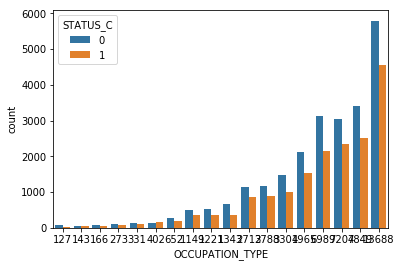

In [7]:
sns.countplot(X_train['OCCUPATION_TYPE'], hue=y_train)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


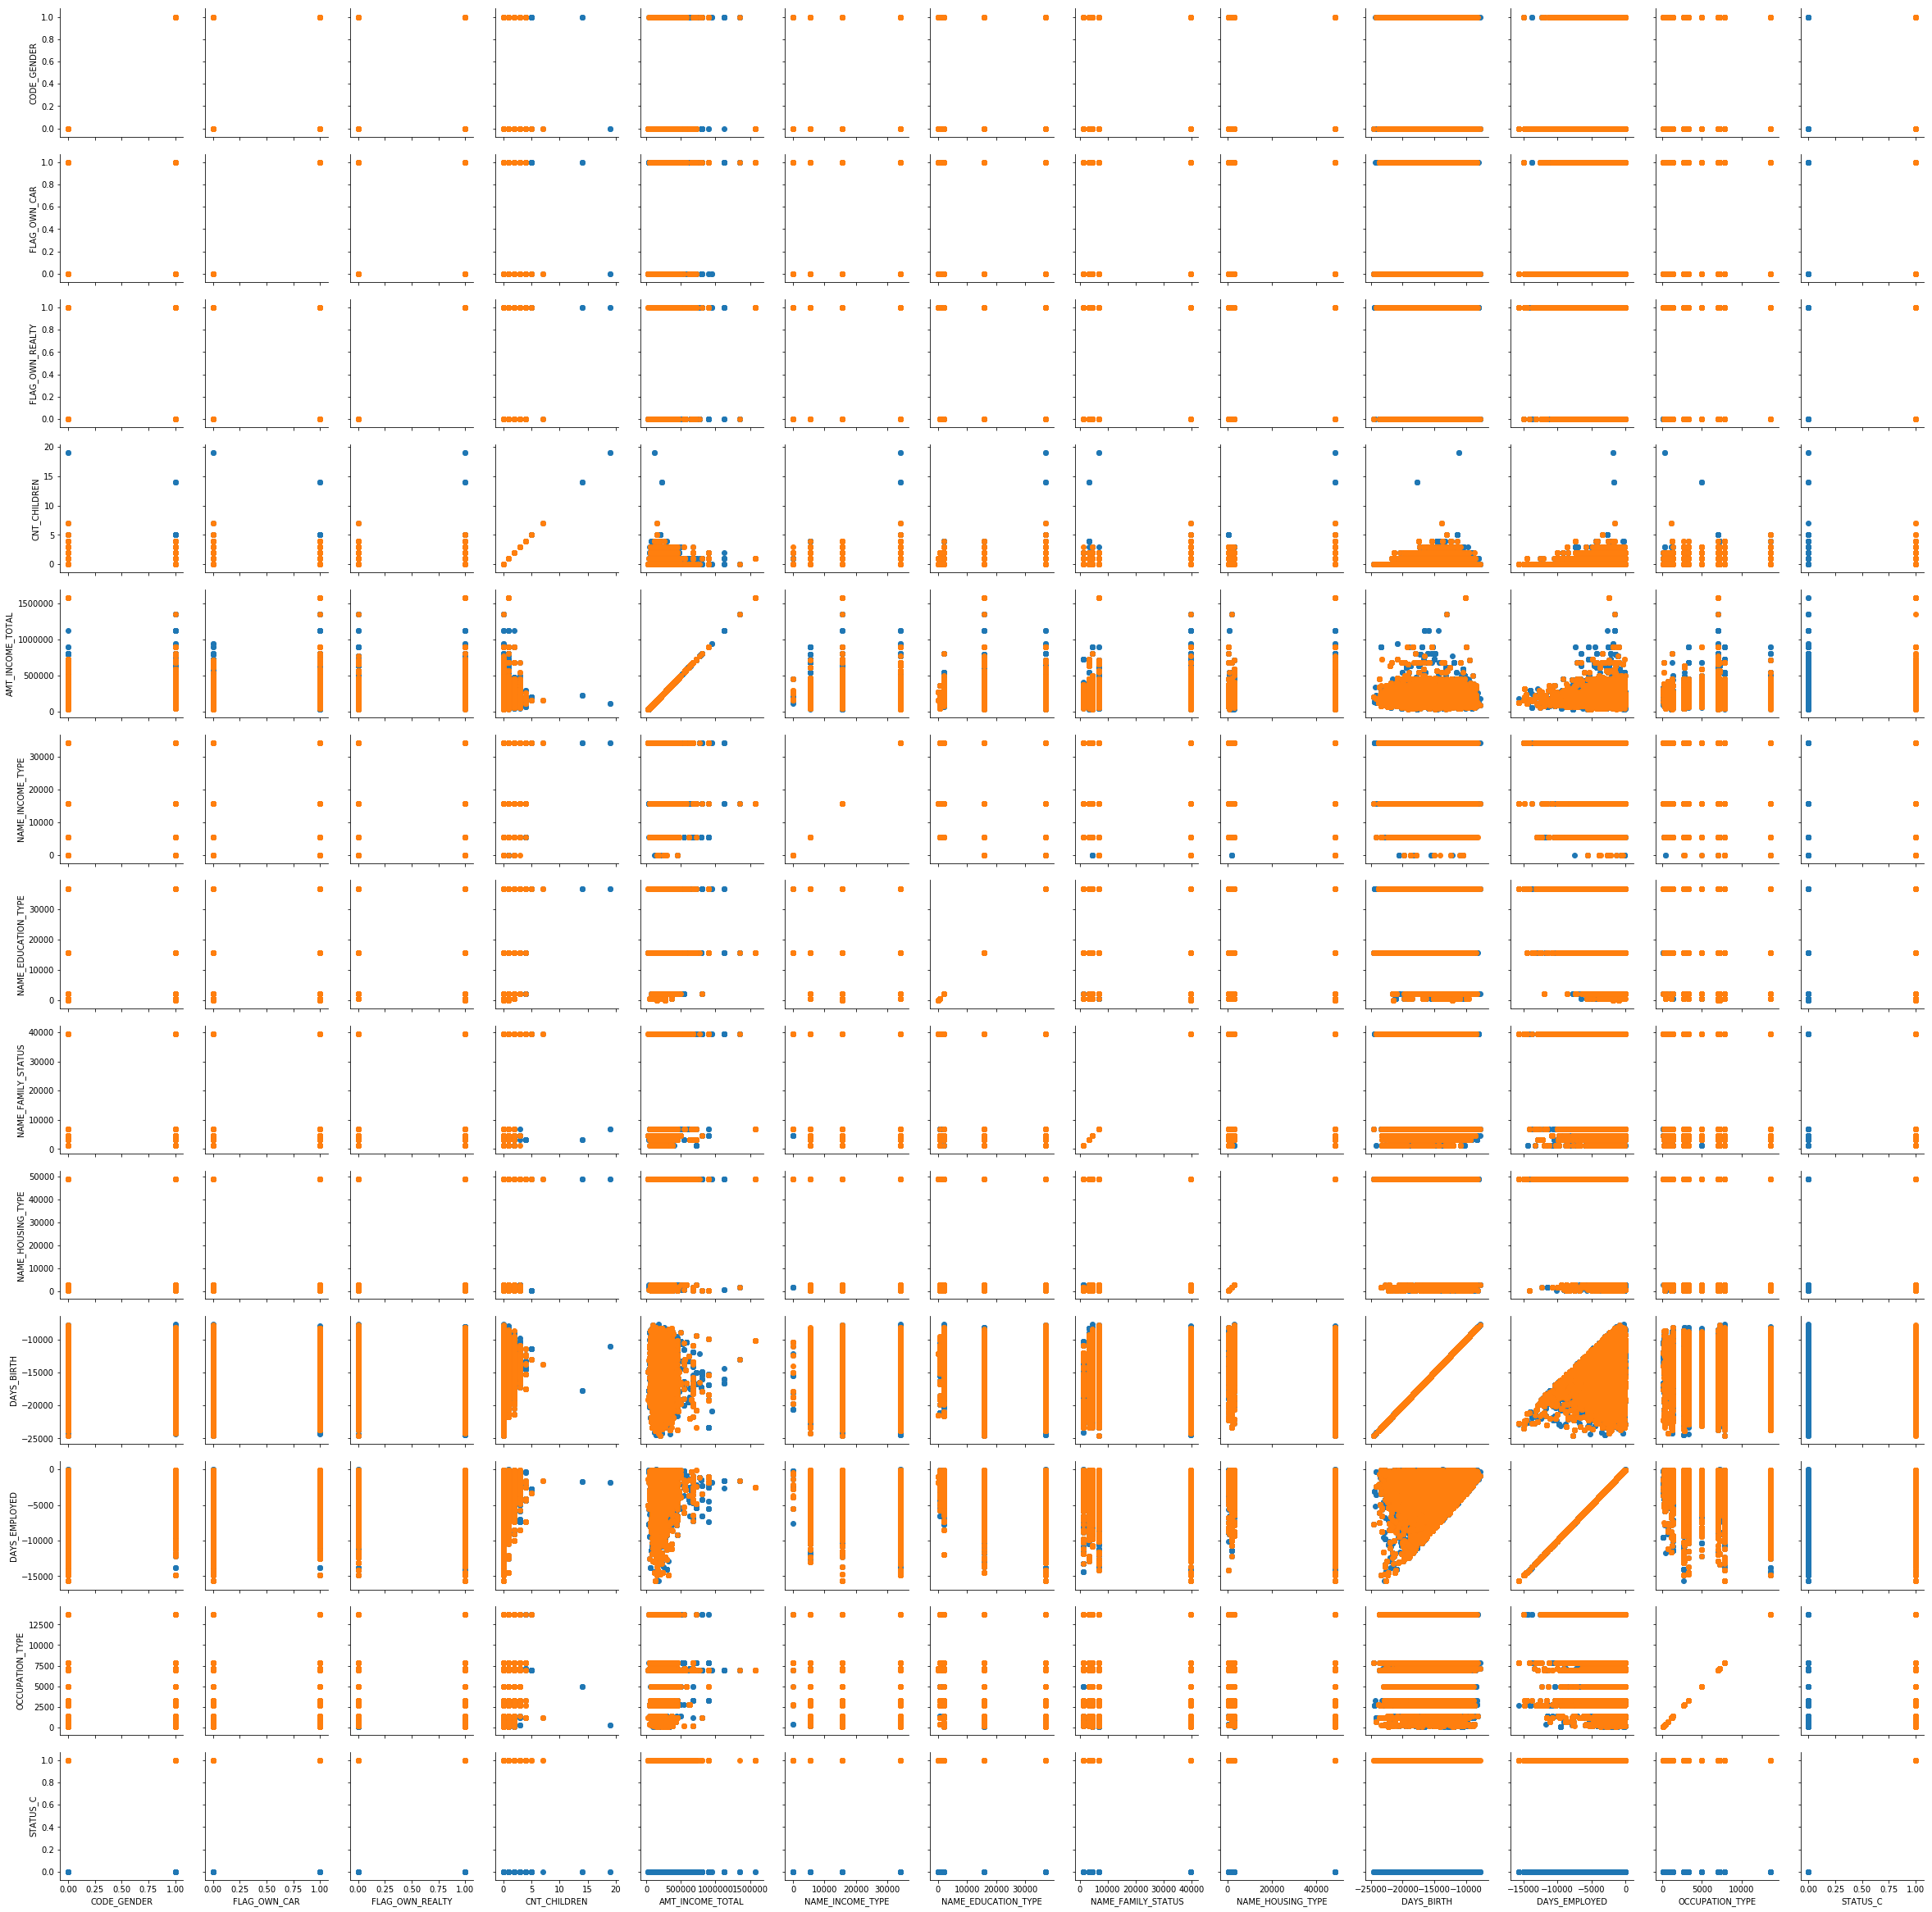

In [8]:
df_for_pairgrid = X_train[['CODE_GENDER',	'FLAG_OWN_CAR',	'FLAG_OWN_REALTY',	'CNT_CHILDREN',	'AMT_INCOME_TOTAL',	'NAME_INCOME_TYPE',	'NAME_EDUCATION_TYPE',	'NAME_FAMILY_STATUS',	'NAME_HOUSING_TYPE',	'DAYS_BIRTH',	'DAYS_EMPLOYED',	'OCCUPATION_TYPE']]
df_for_pairgrid['STATUS_C'] = y_train

sns.PairGrid(df_for_pairgrid, hue='STATUS_C').map(plt.scatter)

('before scaler:', 0.7058440619123391)


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


('after scaler:', 0.6888470996672935)


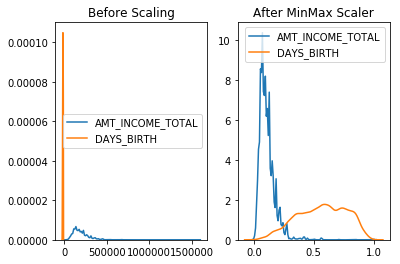

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

print("before scaler:",
      KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train).score(X_test, y_test))

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train, ), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

print("after scaler:",
      KNeighborsClassifier(n_neighbors=3).fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

# графики
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AMT_INCOME_TOTAL'], ax=ax1)
sns.kdeplot(X_train['DAYS_BIRTH'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(X_train_scaled['AMT_INCOME_TOTAL'], ax=ax2)
sns.kdeplot(X_train_scaled['DAYS_BIRTH'], ax=ax2)
plt.show()

In [21]:
X_train_scaled

,MONTHS_BALANCE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0.616667,1.0,1.0,0.0,0.105263,0.069767,1.000000,0.426974,1.000000,1.000000,0.703064,0.897171,0.569427,0.157895
1,0.716667,0.0,0.0,1.0,0.105263,0.098837,1.000000,1.000000,1.000000,1.000000,0.665444,0.581486,0.569427,0.157895
2,0.800000,0.0,0.0,0.0,0.000000,0.063953,0.158557,1.000000,0.052093,1.000000,0.217497,0.825433,0.010766,0.000000
3,0.433333,1.0,1.0,0.0,0.052632,0.244186,0.158557,1.000000,1.000000,1.000000,0.617828,0.847923,0.190694,0.105263
4,0.833333,0.0,0.0,0.0,0.105263,0.075581,1.000000,1.000000,1.000000,1.000000,0.450136,0.682276,0.190694,0.157895
5,0.350000,0.0,0.0,1.0,0.000000,0.026163,1.000000,0.426974,1.000000,1.000000,0.737904,0.921318,0.521864,0.052632
6,0.833333,1.0,1.0,1.0,0.000000,0.186047,0.457721,1.000000,1.000000,0.009725,0.450787,0.872006,0.356758,0.052632
7,0.750000,1.0,0.0,1.0,0.000000,0.040698,1.000000,1.000000,1.000000,1.000000,0.365787,0.918514,1.000000,0.052632
8,0.883333,0.0,0.0,0.0,0.000000,0.029070,0.457721,1.000000,1.000000,0.054982,0.910919,0.929027,0.015043,0.052632
9,0.733333,0.0,0.0,1.0,0.000000,0.069767,0.457721,1.000000,0.145218,1.000000,0.437951,0.822949,0.521864,0.000000


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]:
    print(clf.__class__.__name__, clf.fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

('DecisionTreeClassifier', 0.6558657601620136)
('SGDClassifier', 0.5609720815854188)


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


('SVC', 0.5756545638651815)
('GaussianNB', 0.5613337190799942)
('KNeighborsClassifier', 0.6813250397801244)


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, f1_score, fbeta_score, auc

def classsifier_quality(a):
    print('Accuracy:', accuracy_score(y_test, a))
    print('Precision:', precision_score(y_test, a))
    print('Recall:', recall_score(y_test, a))
    print('ROC AUC:', roc_auc_score(y_test, a))
    pr, rec, _ = precision_recall_curve(y_test, a)
    print('PRC AUC:', auc(rec, pr))
    print('F1:', f1_score(y_test, a)) 
    print('F0.5:', fbeta_score(y_test, a, 0.5))
    print('F2:', fbeta_score(y_test, a, 2))

In [12]:
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train,y_train)
knn_labels = knn_clf.predict(X_test)
knn_predict = knn_clf.predict_proba(X_test)

classsifier_quality(knn_labels)

('Accuracy:', 0.6978157095327644)
('Precision:', 0.7213630406290956)
('Recall:', 0.46906425771262994)
('ROC AUC:', 0.6677523826570436)
('PRC AUC:', 0.7078637287311116)
('F1:', 0.5684775872753562)
('F0.5:', 0.651299285274767)
('F2:', 0.5043433639995603)


knn + scaler:

In [13]:
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train_scaled,y_train)
knn_labels = knn_clf.predict(X_test_scaled)
knn_predict = knn_clf.predict_proba(X_test_scaled)

classsifier_quality(knn_labels)

('Accuracy:', 0.6819036597714451)
('Precision:', 0.7074272804292573)
('Recall:', 0.4269643770240327)
('ROC AUC:', 0.648398635301814)
('PRC AUC:', 0.6887783544029071)
('F1:', 0.5325255102040817)
('F0.5:', 0.6252808147371574)
('F2:', 0.46373431078529376)


In [14]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train,y_train)
tree_labels = tree_clf.predict(X_test)
tree_predict = tree_clf.predict_proba(X_test)

classsifier_quality(tree_labels)

('Accuracy:', 0.6582525676262115)
('Precision:', 0.6018188302425107)
('Recall:', 0.575251406170104)
('ROC AUC:', 0.6473442606927915)
('PRC AUC:', 0.6786551818545064)
('F1:', 0.588235294117647)
('F0.5:', 0.5963108237040178)
('F2:', 0.5803755674783326)


In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_labels = rfc.predict(X_test)
rfc_predict = rfc.predict_proba(X_test)

classsifier_quality(tree_labels)

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


('Accuracy:', 0.6582525676262115)
('Precision:', 0.6018188302425107)
('Recall:', 0.575251406170104)
('ROC AUC:', 0.6473442606927915)
('PRC AUC:', 0.6786551818545064)
('F1:', 0.588235294117647)
('F0.5:', 0.5963108237040178)
('F2:', 0.5803755674783326)


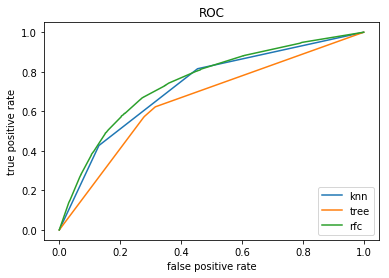

knn:0.724461 tree:0.657191 rfc:0.747425 


In [16]:
import sklearn.metrics as metrics
aucs = ""
for  predicted, descr in zip([knn_predict[:,1],tree_predict[:,1],rfc_predict[:,1]],
                                    ["knn", "tree","rfc"]):
    fpr, tpr, thr = metrics.roc_curve(y_test, predicted)
    plt.plot(fpr, tpr,label=descr)
    aucs += descr + ":%3f"%roc_auc_score(y_test, predicted) + " "
plt.title("ROC")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.show()

print(aucs)

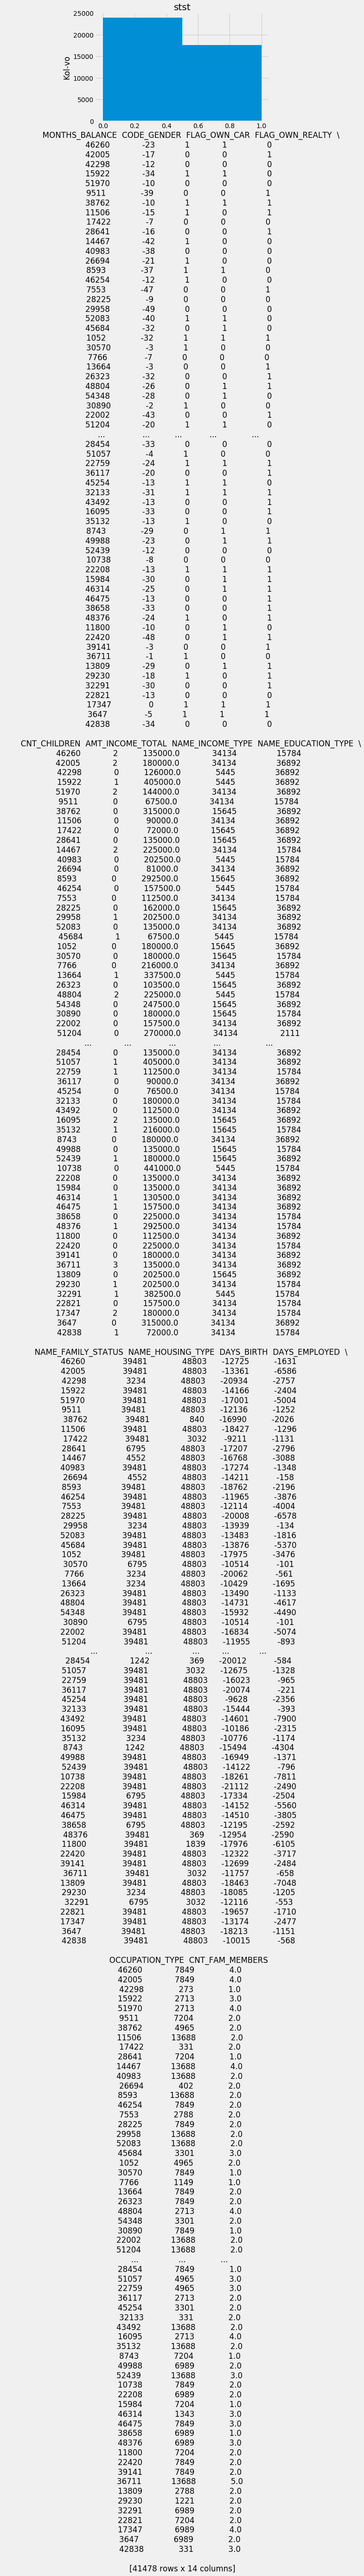

In [17]:
plt.style.use('fivethirtyeight')
plt.hist(y_train, bins=2);
plt.xlabel(X_train); plt.ylabel('Kol-vo');
plt.title('stst');

In [18]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import FunctionTransformer

pipeline = make_pipeline(
                   # добавили удаление признаков в пайплайн                                                                  # параметр validate=False - чтобы функция не пыталась привести все признаки к числам
                   # добавили остальные трансформации признаков
    MinMaxScaler(),                               # нормализацию
    KNeighborsClassifier(n_neighbors=3),          # и сам классификатор с наилучшими параметрами
)

pipeline

Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'))])

In [19]:
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.6888470996672935

In [22]:
import pickle

# нам нужно открыть целевой файл для записи (параметр w) в двоичном виде (параметр b), чтобы записать туда пикл модели
#with open('/home/ale/venv_jupiter/venv_jupiter/Projects/lab2.pickle', 'wb') as opened_file:
#    pickle.dump(pipeline, opened_file)

with open('/content/drive/My Drive/Colab/datasets/lab2.pickle', 'wb') as opened_file:
    pickle.dump(pipeline, opened_file)


In [23]:
import pandas as pd
import pickle

#with open('/home/ale/venv_jupiter/venv_jupiter/Projects/lab2.pickle', 'rb') as f:
#    model = pickle.load(f)

with open('/content/drive/My Drive/Colab/datasets/lab2.pickle', 'rb') as f:
    model = pickle.load(f)
    
model

Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'))])

In [24]:
#data = pd.read_csv('/home/ale/venv_jupiter/venv_jupiter/datasets/application_record_final.csv', sep=',')
data = pd.read_csv('/content/drive/My Drive/Colab/datasets/application_record_final.csv', sep=',')
X = data.drop('STATUS_C', axis='columns')
y = data['STATUS_C']

model.score(X, y)

0.8059995660350066